作业

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting


In [15]:

config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

In [16]:
cols = data.shape[1]
X_data = data.iloc[:,:cols-1].values#X是所有行，去掉最后一列， 未标准化
y_data = data.iloc[:,cols-1:].values#X是所有行，最后一列

In [17]:
data.describe() ## 查看数据的统计信息

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


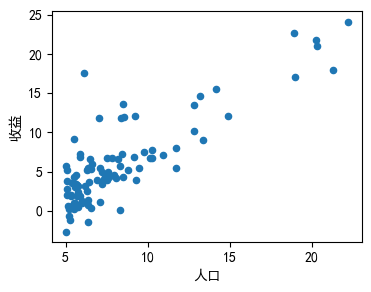

In [18]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(4,3)) # 利用散点图可视化数据
import matplotlib
import matplotlib.pyplot as plt;
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()

引入岭回归模型（L2正则化）

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from sklearn.model_selection import RepeatedKFold

config = {
    "mathtext.fontset": 'stix',
    "font.family": 'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,  # 字号，大家自行调节
    'axes.unicode_minus': False  # 处理负号，即-号
}
rcParams.update(config)  # 设置画图的一些参数

# 读取数据
path = 'C:/Users/Asus/Downloads/regress_data1.csv'
data = pd.read_csv(path)
x_data = data.drop(columns=['收益'])


x = x_data
y = data['收益']

# 使用重复K折交叉验证数据划分法获得训练集和测试集
kf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=None)
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

x_train.insert(0, 'Ones', 1)
X_data = x_train.values
Y_data = y_train.values.reshape(-1, 1)


In [20]:
#损失函数
def computeCost(X, Y, W, lambda_):
    num_samples = X.shape[0]
    Y_hat = np.dot(X, W)
    loss = np.sum((Y_hat - Y) ** 2) / (2 * num_samples) + (lambda_ / (2 * num_samples)) * np.sum(W**2)
    return loss

In [21]:
#梯度下降函数
def gradientDescent(X, Y, W, alpha, lambda_):
    num_samples = X.shape[0]
    Y_hat = np.dot(X, W)
    dW = (X.T @ (Y_hat - Y)) / num_samples + (lambda_ / num_samples) * W
   
    W -= alpha * dW
    return W


In [22]:
#线性回归函数
def linearRegression(X, Y, alpha, lambda_, iters):
    loss_hist = []
    num_features = X.shape[1]
    W = np.zeros((num_features, 1))
    for i in range(iters):
        loss = computeCost(X, Y, W, lambda_)
        loss_hist.append(loss)
        W = gradientDescent(X, Y, W, alpha, lambda_)
    return loss_hist, W

In [23]:
alpha = 0.0001
lambda_ = 0.4  # 正则化参数
iters = 10000
loss_hist, W = linearRegression(X_data, Y_data, alpha, lambda_, iters)

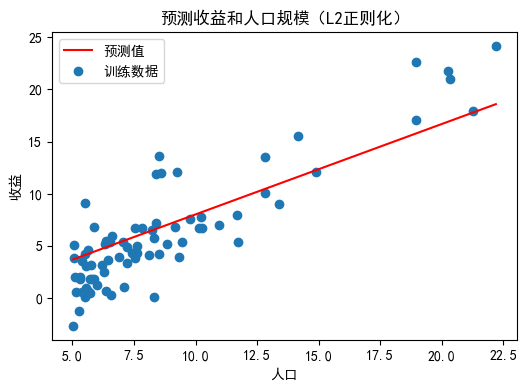

In [24]:
# 绘图
x = np.linspace(x_train['人口'].min(), x_train['人口'].max(), 100)
f = W[0, 0] + (W[1, 0] * x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(x_train['人口'], y_train, label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口')
ax.set_ylabel('收益')
ax.set_title('预测收益和人口规模（L2正则化）')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为微软雅黑
plt.show()

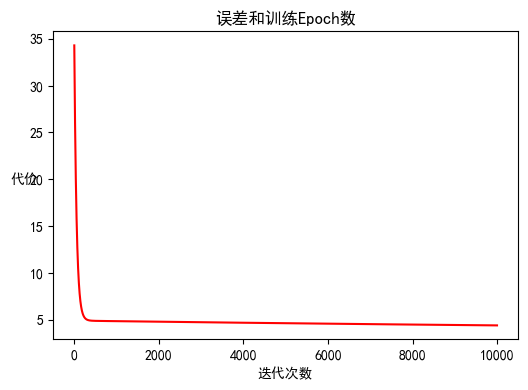

In [25]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), loss_hist, 'r')
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('误差和训练Epoch数')
plt.show()

最小二乘法求解线性回归方程

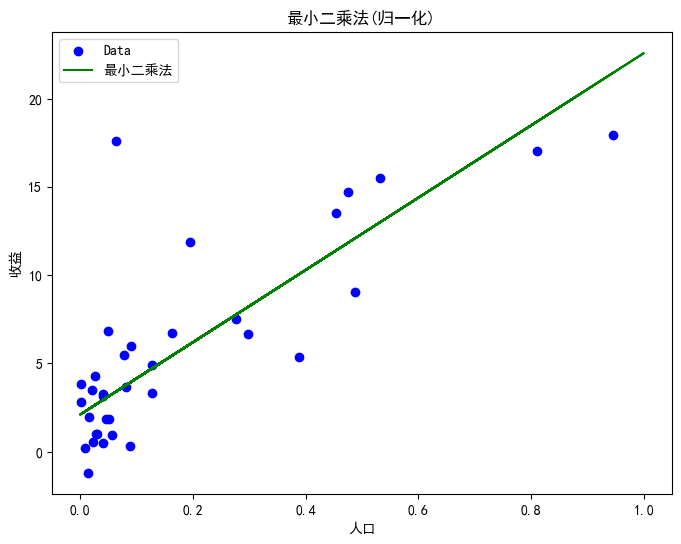

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
config = {
    "mathtext.fontset": 'stix',
    "font.family": 'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,
    'axes.unicode_minus': False
}
rcParams.update(config)

# 读取数据
path = 'C:/Users/Asus/Downloads/regress_data1.csv'
data = pd.read_csv(path)
x_data = data[['人口']]
y_data = data[['收益']]

# 数据归一化
scaler = MinMaxScaler()
x_data_scaled = scaler.fit_transform(x_data)

# 添加偏置项（intercept）
X_data_with_bias = np.c_[np.ones((x_data_scaled.shape[0], 1)), x_data_scaled]

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X_data_with_bias, y_data, test_size=0.36, random_state=42)

# 最小二乘法计算参数theta
theta = np.linalg.inv(X_data_with_bias.T.dot(X_data_with_bias)).dot(X_data_with_bias.T).dot(y_data)

# 可视化线性回归结果
plt.figure(figsize=(8, 6))
plt.scatter(x_test[:, 1], y_test, color='blue', label='Data')
plt.plot(x_data_scaled, X_data_with_bias.dot(theta), color='green', label='最小二乘法')
plt.xlabel('人口')
plt.ylabel('收益')
plt.legend()
plt.title('最小二乘法(归一化)')
plt.show()


画出训练和测试损失曲线

In [27]:
# 损失函数
def computeCost(X, Y, theta):
    m = len(Y)
    J = (1 / (2 * m)) * np.sum((X.dot(theta) - Y) ** 2)
    return J


In [28]:

# 梯度下降函数
def gradientDescent(X, Y, theta, alpha, num_iters):
    m = len(Y)
    J_history = []

    for i in range(num_iters):
        grad = (1 / m) * X.T.dot(X.dot(theta) - Y)
        theta = theta - alpha * grad
        J_history.append(computeCost(X, Y, theta))

    return theta, J_history



In [29]:
# 初始化参数
theta = np.zeros((X_data_with_bias.shape[1], 1))
alpha = 0.0001
num_iters = 10000


C:\Users\Asus\PycharmProjects\pythonProject\venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


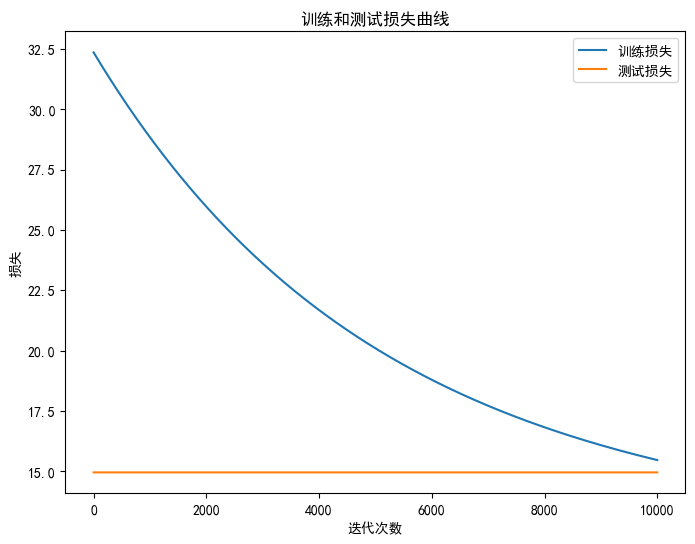

In [30]:
# 使用梯度下降法计算参数
theta, J_history_train = gradientDescent(x_train, y_train, theta, alpha, num_iters)
J_history_test = [computeCost(x_test, y_test, theta)] * num_iters

# 绘制训练和测试损失曲线
plt.figure(figsize=(8, 6))
plt.plot(range(num_iters), J_history_train, label='训练损失')
plt.plot(range(num_iters), J_history_test, label='测试损失')
plt.xlabel('迭代次数')
plt.ylabel('损失')
plt.legend()
plt.title('训练和测试损失曲线')
plt.show()

